# 画像をHSV変換とヒストグラムを使って物体を認識する。

KinectなどでRGC+D情報をとれれば、立体的な情報から物体を認識することもできるのですが、
深さ(D)情報を取れない場合などはRGB画像からなんらかの特徴量を抽出してそれをもとに物体を認識することがあります。
ときにはそれがエッジ情報だったり、物体サンブルがある場合はパターン認識などにより行いますが
ここでは簡単なRGB->HSV変換により、画像中の物体を認識する手法についてとりあげます。

PythonだとOpenCVというライブラリが提供されていて、このRGB->HSVの変換を非常に簡単に行うことができます。
* https://docs.opencv.org/3.0.0/df/d9d/tutorial_py_colorspaces.html

HSV変換について知りたい場合は、下記などをご参照下さい。
* https://ja.wikipedia.org/wiki/HSV%E8%89%B2%E7%A9%BA%E9%96%93

使用するライブラリは下記のimport部分をご参照下さい。

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

以下はほぼお約束ですが、Jupyter notebookの中で図を表示したいので以下の一行を記述しておきます。

In [34]:
%matplotlib inline

RGB画像をロードします。

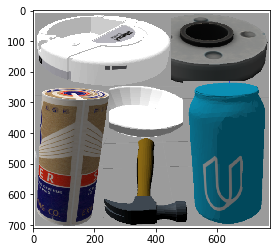

In [35]:
# Read in an image
image = mpimg.imread('sample.jpeg')
# Your other options for input images are:
    # hammer.jpeg
    # beer.jpeg
    # bowl.jpeg
    # create.jpeg
    # disk_part.jpeg
    
plt.imshow(image)

まずはRGBに分解して表示してみます。結果RGBの各画像間に差異はなく、分解しても特徴的な情報がとれないことがわかります。これだったらデータ量も考えてグレースケールや、白黒の2値画像でも十分かもしれません。実際にあるしきい値で変換した白黒画像で物体の識別がうまくいくことがあります。

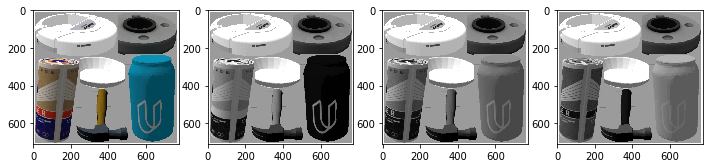

In [41]:
r_image = image[:,:,0]
g_image = image[:,:,1]
b_image = image[:,:,2]
#plt.imshow(g_image)
fig = plt.figure(figsize = (12,4))
plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.subplot(142)
plt.imshow(r_image, cmap='gray')
plt.subplot(143)
plt.imshow(g_image, cmap='gray')
plt.subplot(144)
plt.imshow(b_image, cmap='gray')

In [28]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Compute the histogram of the HSV channels separately
    # Take histograms in R, G, and B
    h_hist = np.histogram(image[:,:,0], bins=nbins, range=(0, 256))
    s_hist = np.histogram(image[:,:,1], bins=nbins, range=(0, 256))
    v_hist = np.histogram(image[:,:,2], bins=nbins, range=(0, 256))
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    # Normalize the result
    # Return the feature vector
    norm_features = hist_features / np.sum(hist_features)

    return norm_features, img_hsv

HSVに分解すると

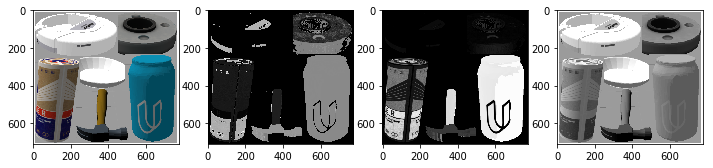

In [42]:
feature_vec, img_hsv = color_hist(image, nbins=32, bins_range=(0, 256))

h_image = img_hsv[:,:,0]
s_image = img_hsv[:,:,1]
v_image = img_hsv[:,:,2]
#plt.imshow(g_image)
fig = plt.figure(figsize = (12,4))
plt.subplot(141)
plt.imshow(image)
plt.subplot(142)
plt.imshow(h_image, cmap='gray')
plt.subplot(143)
plt.imshow(s_image, cmap='gray')
plt.subplot(144)
plt.imshow(v_image, cmap='gray')

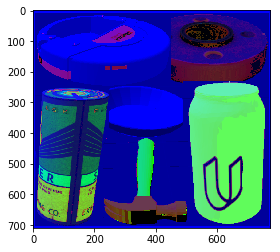

In [15]:
plt.imshow(img_hsv)

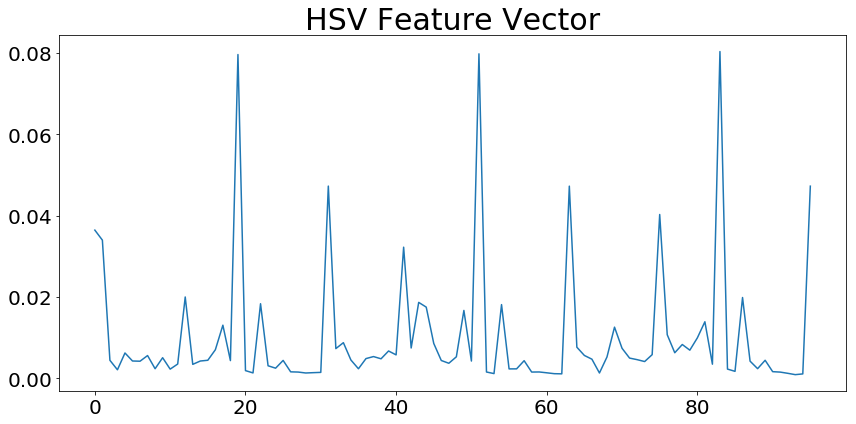

In [43]:
# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')

In [ ]:
恣意的なフィルタであるようにも思えますが、人間の眼もエッジを抽出することに適したフィルタがあったり、
など”恣意的”な物体認識のための機能がハード的に埋め込まれていたり、ま、認識アルゴリズムの選択なんて
所詮恣意的な要素が大きいものだと思います。